In [1]:
import os
os.getcwd()
os.chdir('C:\\DS\\PYTHON_BASICS')

In [2]:
import pandas as pd
df=pd.read_csv('F:\\data science\\csv\\explo_linear.csv')

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
lm=LinearRegression()

## Model Evaluation
### 1.Residuals Plot

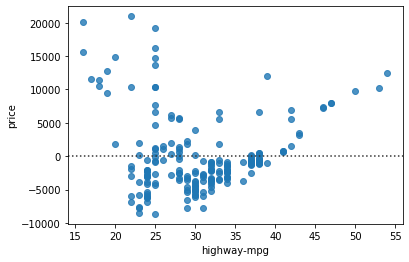

In [6]:
#width=12
#height=10
#plt.figure(figsize=(width,height))
sns.residplot(df['highway-mpg'],df['price'])

In [7]:
z=df[['horsepower','curb-weight','engine-size','highway-mpg']]
lm.fit(z,df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
yhat=lm.predict(z)

Text(0, 0.5, 'Proportion of Cars')

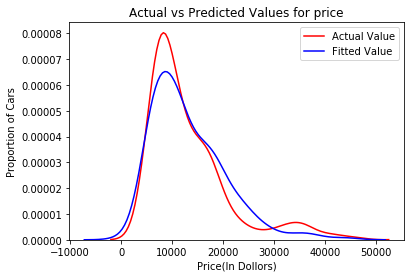

In [9]:
ax1=sns.distplot(df['price'],hist=False, color='r',label='Actual Value')
sns.distplot(yhat,hist=False, color='b', label='Fitted Value',ax=ax1)
plt.title('Actual vs Predicted Values for price')
plt.xlabel('Price(In Dollors)')
plt.ylabel('Proportion of Cars')

In [10]:
cor_price=df.corr().price

In [11]:
cor_price[cor_price > 0.5].index

Index(['wheel-base', 'length', 'width', 'curb-weight', 'engine-size', 'bore',
       'horsepower', 'price', 'city-L/100km'],
      dtype='object')

In [12]:
x=df[['wheel-base', 'length', 'width', 'curb-weight', 'engine-size', 'bore',
       'horsepower', 'city-L/100km']]
x

,wheel-base,length,width,curb-weight,engine-size,bore,horsepower,city-L/100km
0,88.6,0.811148,0.890278,2548,130,3.47,111.0,11.190476
1,88.6,0.811148,0.890278,2548,130,3.47,111.0,11.190476
2,94.5,0.822681,0.909722,2823,152,2.68,154.0,12.368421
3,99.8,0.848630,0.919444,2337,109,3.19,102.0,9.791667
4,99.4,0.848630,0.922222,2824,136,3.19,115.0,13.055556
...,...,...,...,...,...,...,...,...
196,109.1,0.907256,0.956944,2952,141,3.78,114.0,10.217391
197,109.1,0.907256,0.955556,3049,141,3.78,160.0,12.368421
198,109.1,0.907256,0.956944,3012,173,3.58,134.0,13.055556
199,109.1,0.907256,0.956944,3217,145,3.01,106.0,9.038462


In [13]:
y=df.price
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
196    16845.0
197    19045.0
198    21485.0
199    22470.0
200    22625.0
Name: price, Length: 201, dtype: float64

In [14]:
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
xyhat=lm.predict(x)
xyhat[0:5]

array([12618.77467034, 12618.77467034, 18952.66991602, 11328.50730572,
       16893.6367509 ])

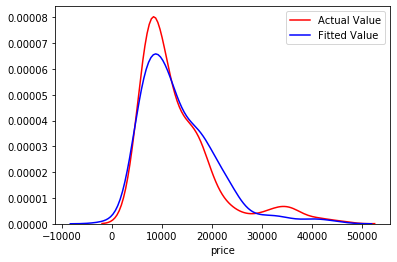

In [16]:
ax1=sns.distplot(df['price'],hist=False, color='r',label='Actual Value')
sns.distplot(xyhat,hist=False, color='b', label='Fitted Value',ax=ax1)

## Polynomial Regression

In [17]:
def plotpolly(model,independent_variable,dependent_variable,Name):
    x_new=np.linspace(15,55,100)
    y_new=model(x_new)
    plt.plot(independent_variable,dependent_variable,'.',x_new,y_new,'-')
    plt.title('Polynomial fit with Matplotlib for Price ~ Length')
    #ax=plt.gca()
    #fig=plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')
    plt.show()
    plt.close()
print('Done')

Done


        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


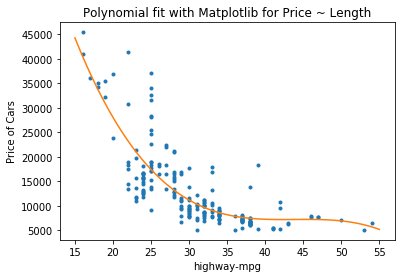

In [18]:
import numpy as np
x=df['highway-mpg']
y=df['price']
f=np.polyfit(x,y,3)
p=np.poly1d(f)
print(p)
plotpolly(p,x,y,'highway-mpg')

## How to do polynomial working for more variable or for more features use steps or path given below
### 1.Transform the data i.e. Create higher order features
### 2.Fit a Linear Regression model with your transformed features

In [19]:
from sklearn.preprocessing import PolynomialFeatures

In [20]:
pr=PolynomialFeatures(degree=2)

In [21]:
x_polly=pr.fit_transform(df[['horsepower','curb-weight']])
x_polly

array([[1.0000000e+00, 1.1100000e+02, 2.5480000e+03, 1.2321000e+04,
        2.8282800e+05, 6.4923040e+06],
       [1.0000000e+00, 1.1100000e+02, 2.5480000e+03, 1.2321000e+04,
        2.8282800e+05, 6.4923040e+06],
       [1.0000000e+00, 1.5400000e+02, 2.8230000e+03, 2.3716000e+04,
        4.3474200e+05, 7.9693290e+06],
       ...,
       [1.0000000e+00, 1.3400000e+02, 3.0120000e+03, 1.7956000e+04,
        4.0360800e+05, 9.0721440e+06],
       [1.0000000e+00, 1.0600000e+02, 3.2170000e+03, 1.1236000e+04,
        3.4100200e+05, 1.0349089e+07],
       [1.0000000e+00, 1.1400000e+02, 3.0620000e+03, 1.2996000e+04,
        3.4906800e+05, 9.3758440e+06]])

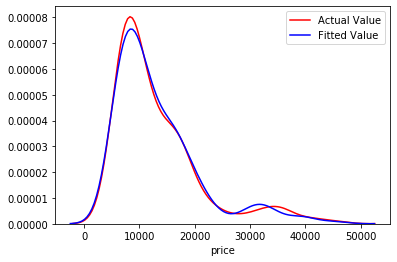

In [22]:
x_c_polly=pr.fit_transform(df[['wheel-base', 'length', 'width', 'curb-weight', 'engine-size', 'bore',
       'horsepower', 'city-L/100km']])
y=df.price
#print(len(x_c_polly))
lm.fit(x_c_polly,y)
yhat=lm.predict(x_c_polly)
ax1=sns.distplot(df['price'],hist=False, color='r',label='Actual Value')
sns.distplot(yhat,hist=False, color='b', label='Fitted Value',ax=ax1)


In [23]:
from sklearn.metrics import r2_score,mean_squared_error
print(r2_score(y,yhat)) #Used of Calculating R Square Value
print(mean_squared_error(y,yhat)) #Used for Calculating Mean Squared Error

0.9052394806321467
5954907.881593379


In [24]:
from sklearn.model_selection import train_test_split

In [25]:
y_data=df.price
x_data=df.drop('price',axis=1)
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.3,random_state=1)
#If we select 0.3 as test_size then test data is created of 30%
print("Number of test samples:",x_test.shape[0])
print("Number of traning samples:",x_train.shape[0])

Number of test samples: 61
Number of traning samples: 140


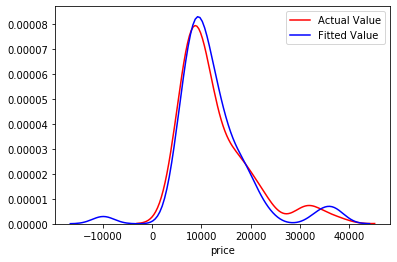

In [26]:
polly_x=pr.fit_transform(x_train[['wheel-base', 'length', 'width', 'curb-weight', 'engine-size', 'bore','horsepower', 'city-L/100km']])
polly_y=y_train
lm.fit(polly_x,polly_y)
xx=x_test[['wheel-base', 'length', 'width', 'curb-weight', 'engine-size', 'bore','horsepower', 'city-L/100km']]
xx=pr.fit_transform(x_test[['wheel-base', 'length', 'width', 'curb-weight', 'engine-size', 'bore','horsepower', 'city-L/100km']])
yhat=lm.predict(xx)
ax1=sns.distplot(y_test,hist=False, color='r',label='Actual Value')
sns.distplot(yhat,hist=False, color='b', label='Fitted Value',ax=ax1)

In [27]:
type(y_test)

pandas.core.series.Series

## Cross Validation :
### Cross validation is used to validate to fit a model across multiple sets of training & test data.
### Techniques used for cross validation:
### 1.k-Fold Cross Validation
### 2.Leave One Out Cross Validation
### 3.Random Cross Validation

In [28]:
from sklearn.linear_model import LinearRegression
lre=LinearRegression()
lre.fit(x_train[['horsepower']],y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
lre.score(x_test[['horsepower']],y_test)

0.6287485044222196

In [30]:
lre.score(x_train[['horsepower']],y_train)

0.6628063120233265

In [31]:
from sklearn.model_selection import cross_val_score

In [32]:
rcross=cross_val_score(lre,x_data[['horsepower']],y_data,cv=4)
rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [33]:
print('The mean of the folds are:',rcross.mean(),'and the standard deviation is:',rcross.std())

The mean of the folds are: 0.522009915042119 and the standard deviation is: 0.2911839444756029


In [34]:
lre.fit(x_train[['wheel-base', 'length', 'width', 'curb-weight', 'engine-size', 'bore','horsepower', 'city-L/100km']],y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
lre.score(x_train[['wheel-base', 'length', 'width', 'curb-weight', 'engine-size', 'bore','horsepower', 'city-L/100km']],y_train)

0.8294697364649697

In [36]:
lre.score(x_test[['wheel-base', 'length', 'width', 'curb-weight', 'engine-size', 'bore','horsepower', 'city-L/100km']],y_test)

0.7840739020724671

In [37]:
rcross=cross_val_score(lre,x_data[['wheel-base', 'length', 'width', 'curb-weight', 'engine-size', 'bore','horsepower', 'city-L/100km']],y_data,cv=4)
print(rcross)
print('mean',rcross.mean(),"    ",rcross.std())

[0.83028978 0.80304541 0.37484463 0.44138457]
mean 0.6123910967963457      0.20585216636485684


## Ridge Regression

In [38]:
pr=PolynomialFeatures(degree=2)

In [47]:
x_train_pr=pr.fit_transform(x_train[['horsepower','curb-weight','engine-size','highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_train[['horsepower','curb-weight','engine-size','highway-mpg','normalized-losses','symboling']])

In [48]:
from sklearn.linear_model import Ridge

In [49]:
ridgemodel=Ridge(alpha=0.1)

In [50]:
ridgemodel.fit(x_train_pr,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.52689e-17): result may not be accurate.
  overwrite_a=True).T


Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [51]:
yhat=ridgemodel.predict(x_test_pr)

In [52]:
yhat[0:5]

array([31720.56204596,  6554.54978945,  6451.0990747 , 10504.63382401,
        4708.32043106])